# 인공 신경망의 개요

In [11]:
# pip install mglearn
# pip install graphviz

In [14]:
import mglearn

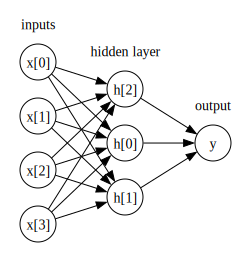

In [15]:
# 은닉층이 1개인 인공신경망
mglearn.plots.plot_single_hidden_layer_graph()

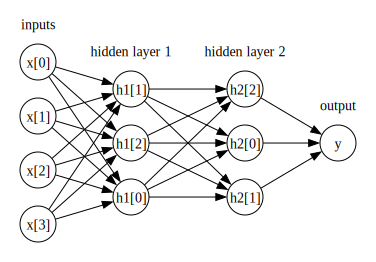

In [16]:
mglearn.plots.plot_two_hidden_layer_graph()

In [69]:
# 랜덤 데이터
from sklearn.datasets import make_moons

# noise 표준편차
X, y = make_moons(n_samples=100, noise=0.25, random_state=3) # 샘플수 / 표준편차 / 랜덤 시드

In [74]:
print(X)
print(y)

[[ 1.87756309  0.56839425]
 [ 0.36877983 -0.34894509]
 [ 0.96515318  0.10921819]
 [ 0.48599685  0.20291313]
 [ 1.72532644  0.53367598]
 [ 1.47976586  0.08726406]
 [ 2.11889248  0.60498388]
 [-0.74017805  0.49615542]
 [-0.38099245  1.34740194]
 [ 0.22944941  0.87981305]
 [ 1.31311917 -0.69665985]
 [ 0.87435391  0.83750547]
 [ 0.77145295 -0.69709227]
 [ 1.26285558  0.12916271]
 [-0.71988634  0.69106791]
 [ 0.79205253 -0.40516241]
 [ 1.31886119 -0.41396289]
 [ 0.26579093  0.78151982]
 [ 0.08686038  0.49400243]
 [-0.74872343 -0.06972957]
 [ 0.88404174 -0.35425773]
 [ 1.02671711  0.73292915]
 [ 0.73867317  0.30808589]
 [ 1.12856036  0.33191968]
 [ 1.15536561 -0.50593577]
 [ 1.56825139 -0.05911358]
 [ 0.29004812  1.00820293]
 [ 0.64076308 -0.19860992]
 [-1.20034998  0.46412528]
 [-0.16955317  0.60660877]
 [-0.53369875  0.50244086]
 [ 1.00549331  0.38686701]
 [ 0.65294065  0.80929512]
 [-0.56688607  0.73004641]
 [ 1.71942343  0.32909081]
 [ 0.96514959  0.51823046]
 [ 0.2683596  -0.11030872]
 

In [ ]:
# recall 재현율


#   0       1       합계
#   60      20      80
#   20      20      40  -> under sampling
#   60      60      120  -> over sampling

# 교차 검증

#   5세트

#   20      20      20      20      20
#   test
#           test
#                   test
#                           test
#                                   test

In [70]:
from sklearn.model_selection import train_test_split

# stratify=y : 학습용 데이터와 검증용 데이터에서 각각의 타겟값들이 동일한 비율로 나타나도록 함
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0)
#                        검증용(20%)  0과 1을 동수(같은 수로 맞춰줌_y값을 기준으로)

In [71]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=0, max_iter=5000).fit(X_train, y_train)
#                                     최대 반복횟수    적용
# hidden_layer_sizes=(100), 은닉층에서 사용할 유닛수의 기본값 : 100
# 데이터가 매우 적은 상태이므로 100개를 쓰는 것보다 줄이는 것이 좋음
# 은닉유닛을 줄이면 모델의 복잡도는 낮아짐

print(model.score(X_train,y_train))
print(model.score(X_test, y_test))

0.925
0.9


Text(0.5, 0, 'class 1')

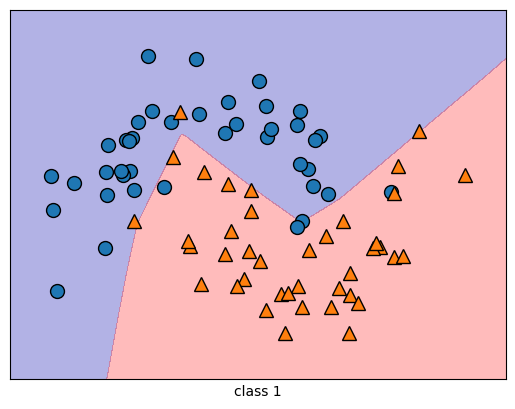

In [72]:
from matplotlib import pyplot as plt
mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("class 0")
plt.xlabel("class 1")

In [75]:
# 은닉유닛을 10개로 줄이고 테스트
model = MLPClassifier(random_state=0, hidden_layer_sizes=[10], max_iter=1000)
#                                     노드 수를 10개

model.fit(X_train, y_train)

print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

0.85
0.85


Text(0, 0.5, 'class 1')

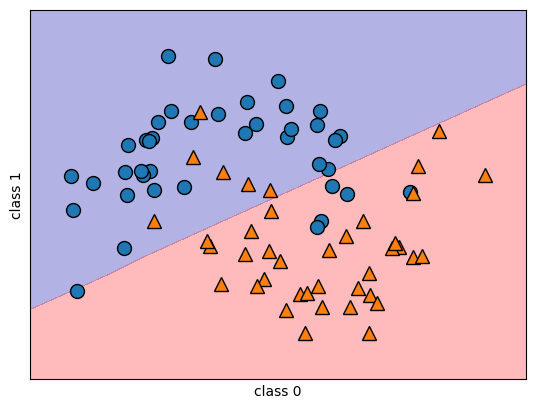

In [76]:
mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("class 0")

plt.ylabel("class 1")

In [77]:
# 10개의 유닛으로 된 두 개의 은닉층 [10,10]

model = MLPClassifier(random_state=0,hidden_layer_sizes=[10, 10], max_iter=500)
#                                    히든 레이어를 2개로 쌓음
#                                     10     10

model.fit(X_train, y_train)

print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

0.8375
0.85


Text(0, 0.5, 'class 1')

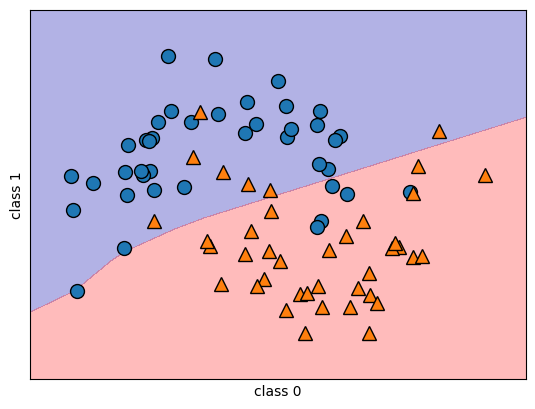

In [79]:
mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("class 0")

plt.ylabel("class 1")

1.0
1.0


Text(0, 0.5, 'class 1')

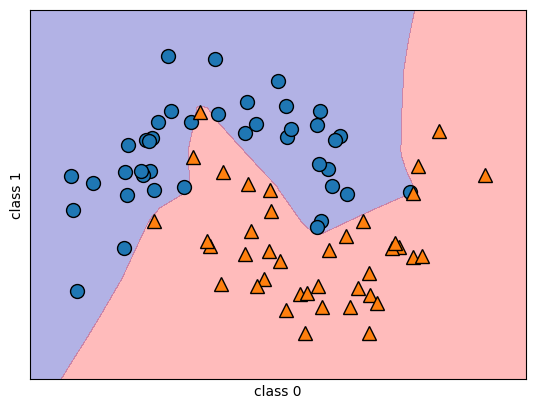

In [80]:
# 100개의 유닛으로 된 세 개의 은닉층 [100,100,100]

model = MLPClassifier(random_state=0,hidden_layer_sizes=[100,100,100], max_iter=500)
#                                    히든 레이어를 3개로 쌓음
#                                     100     100     100

model.fit(X_train, y_train)

print(model.score(X_train,y_train)) # score : 분류 정확도

print(model.score(X_test,y_test))

mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("class 0")

plt.ylabel("class 1")

In [82]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[10,  0],
       [ 0, 10]], dtype=int64)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

# precision(모형) recall(실제) f1-score(precision과 recall의 조화평균)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
# 분류  classification  객관식  정확도, accracy
#                              roc curve
# 회귀  regression      주관식  mse, mae, rmse
#                              r-squared

# 퍼셉트론

In [ ]:
# 히든 레이어가 없음 -> 입력과 출력층만 존재

-0.7
(0, 0) => 0
-0.19999999999999996
(1, 0) => 0
-0.19999999999999996
(0, 1) => 0
0.30000000000000004
(1, 1) => 1


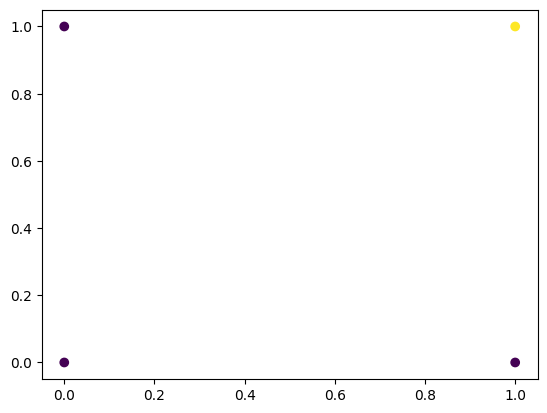

In [85]:
# 단층 퍼셉트론
import numpy as np
X = np.array([(0,0),(0,1),(1,0),(1,1)])
y = np.array([0,0,0,1])
plt.scatter(X[:,0], X[:,1], c=y)

# 가중치 : 각 입력 신호가 결과에 영향을 주는 중요도를 조절하는 매겨변수
# 편향 : 한 쪽으로 치우쳐 균형을 깬다는 의미, 뉴런의 활성화 정도를 조절하는 매개변수

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5]) # 가중치
    b = -0.7    # 절편(편향)
    tmp = np.sum(w*x) + b   # 둘 다 0이 입력되었는데 0이 되지 않는 것은 편향값 때문
    print(tmp)
    # 0보다 작으면 0, 아니면 1을 리턴
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0,0), (1,0), (0,1), (1,1)]:
    y = AND(xs[0], xs[1])
    print(xs, "=>", y)

In [86]:
from sklearn.neural_network import MLPClassifier  

import mglearn model = MLPClassifier(random_state=0,max_iter=1000).fit(X, y)

mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=.3)  

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("class 0")  

plt.ylabel("class 1")

SyntaxError: invalid syntax (3066179493.py, line 3)

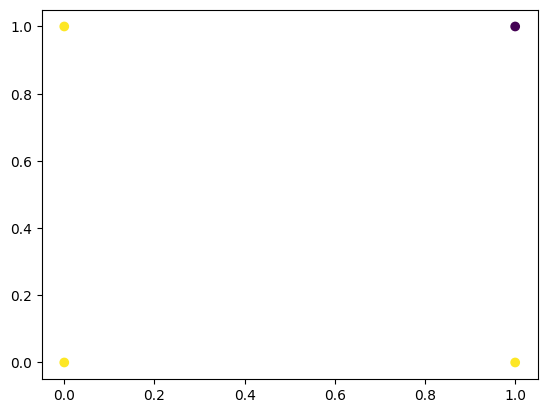

In [87]:
# NAND : AND의 역산(Not AND)

X=np.array([(0,0),(0,1),(1,0),(1,1)])

y=np.array([1,1,1,0])  

plt.scatter(X[:, 0], X[:, 1], c=y)

In [89]:
def OR(x1, x2):

    x = np.array([x1, x2])

    w = np.array([0.5, 0.5])

    b = -0.2 #and와 값이 다름

    tmp = np.sum(w*x) + b

    print(tmp)

    if tmp <= 0:

        return 0

    else:

        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:

    y = OR(xs[0], xs[1])

    print(str(xs) + " -> " + str(y))

-0.2
(0, 0) -> 0
0.3
(1, 0) -> 1
0.3
(0, 1) -> 1
0.8
(1, 1) -> 1


Text(0, 0.5, 'class 1')

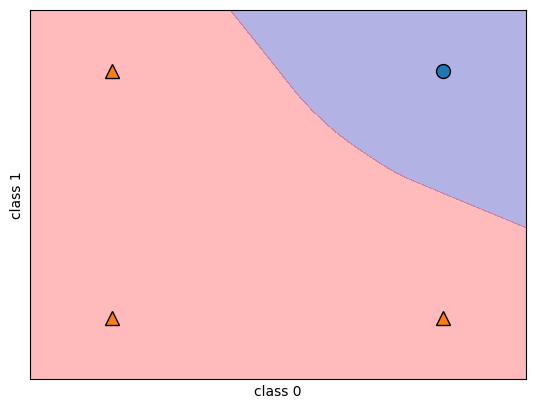

In [88]:
model = MLPClassifier(random_state=0,max_iter=1000).fit(X, y)  

mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=.3)  

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)  

plt.xlabel("class 0")  

plt.ylabel("class 1")

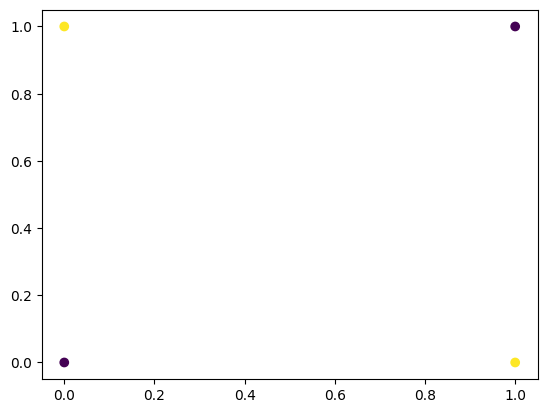

In [90]:
# 다층 퍼셉트론
#단층퍼셉트론의 한계 : xor를 풀 수는 없다. 하지만 게이트를 조합하면 가능하다.

X=np.array([(0,0),(0,1),(1,0),(1,1)])

y=np.array([0,1,1,0])  

plt.scatter(X[:, 0], X[:, 1], c=y)

In [91]:
def XOR(x1, x2):

    s1 = NAND(x1, x2)

    s2 = OR(x1, x2)
    y = AND(s1, s2)

    return y

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:

    y = XOR(xs[0], xs[1])

    print(str(xs) + " -> " + str(y))

NameError: name 'NAND' is not defined

Text(0, 0.5, 'class 1')

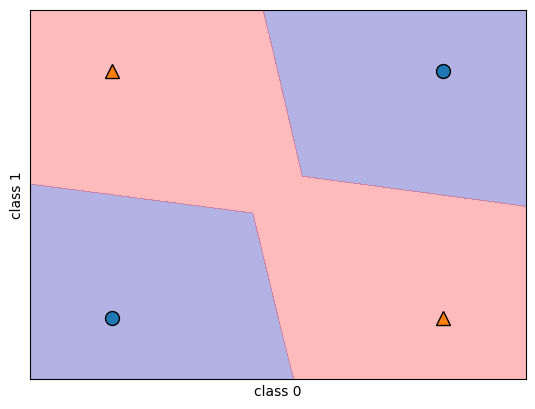

In [92]:
model = MLPClassifier(random_state=0,max_iter=1000).fit(X, y)  

mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=.3)  

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("class 0")  

plt.ylabel("class 1")